# Section 2. Exploratory Data Analysis 

In this section, we will cover performing exploratory data analysis(EDA) on a data set by demoing various kinds of visualizations. This tutorial does not cover all the visualization methods and should serve just a starting point for you. 

Given a fixed data set, there can be inifite ways on how we explore and visualize it. At that point, it is up to you, the data scientist, to decide which visual **coneys the most information and makes the most sense to the audiences**. 

**Hint**: keep in mind about the hypotheses that we initially proposed! 

### CONTENTS
* <a href='00 - DSC 2022 Welcome and Logistics.ipynb#top'>**Section 0. Welcome and Logistics**</a> 
* <a href='01 - DSC 2022 Problem Definition.ipynb#top'>**Section 1. Problem Definition**</a> 
* <a href='02 - DSC 2022 Exploratory Data Analysis.ipynb#top'>**Section 2. Exploratory Data Analysis**</a> 
  * [1. Univariate analysis](#uni)
  * [2. Covariate analysis](#co)
* <a href='03 - DSC 2022 Hypothesis testing.ipynb#top'>**Section 3. Hypothesis Testing**</a> 
* <a href='04 - DSC 2022 Feature Engineering.ipynb#top'>**Section 4. Feature Engineering**</a> 
* <a href='05 - DSC 2022 Modeling.ipynb#top'>**Section 5. Modeling**</a>
* <a href='06 - DSC 2022 Modeling with Deep Learning.ipynb#top'>**Section 6. Modeling with Deep Learning**</a>
* <a href='07 - DSC 2022 Submission.ipynb#top'>**Section 7. Submission**</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cmg = pd.read_excel('cmg.xlsx',index_col = 'offeringId')
cmg.head(5)

,offeringPricingDate,offeringType,offeringSector,offeringSubSector,offeringDiscountToLastTrade,offeringPrice,issuerCusip,issuerName,pre15_Price_Normalized,pre14_Price_Normalized,...,pre1_Price_Normalized,underwriters,totalBookrunners,leftLeadFirmId,leftLeadFirmName,post1_Price_Normalized,post7_Price_Normalized,post30_Price_Normalized,post90_Price_Normalized,post180_Price_Normalized
offeringId,,,,,,,,,,,,,,,,,,,,,
b969a1c8-0a26-438a-81e6-5e95f3b30501,2003-10-02,IPO,Consumer Cyclical,Vehicles & Parts,0.0,13.0,501889208,BharCap Acquisition Corp.,NaN,NaN,...,NaN,[{'firmId': '15af8b8d-c949-4fa0-b35e-a6482d3ca...,2,759ce574-3755-480b-8b83-c614f4568db1,Baird,-0.855769,-0.850000,-0.831635,-0.825481,-0.836538
1081394b-c9f2-4479-8dd2-528027ff1eea,2005-07-21,IPO,Communication Services,Telecom Services,0.0,13.0,209034107,GrandSouth Bancorporation,NaN,NaN,...,NaN,[{'firmId': 'dac135c0-9e99-4362-9762-7179a0023...,2,5eb63e75-8f95-464e-86fe-3222865c54ef,Credit Suisse,0.060769,0.136923,0.041538,-0.018462,-0.016923
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0,2005-08-04,IPO,Communication Services,Internet Content & Information,0.0,27.0,056752108,Brand Velocity Acquisition Corp,NaN,NaN,...,NaN,[{'firmId': 'a82a866c-d40e-453a-99e1-8acb44efb...,2,dac135c0-9e99-4362-9762-7179a0023c9e,Goldman Sachs & Co.,-0.546148,-0.637407,-0.711852,-0.746296,-0.798111
43f06950-8d20-4cfc-b16d-237e0927e1e6,2005-11-10,IPO,Industrials,Consulting Services,0.0,16.0,G47567105,ProLung Inc.,NaN,NaN,...,NaN,[{'firmId': 'a82a866c-d40e-453a-99e1-8acb44efb...,2,cd9cd378-73b5-4cef-8666-ad2c5149ccd8,Goldman Sachs & Co.,-0.699502,-0.697394,-0.682808,-0.566124,-0.512702
96a13598-121a-41c0-83b5-448843cd8709,2006-02-03,IPO,Energy,Oil & Gas Midstream,0.0,21.0,29273V100,Golden Star Acquisition Corp,NaN,NaN,...,NaN,[{'firmId': '7d932034-3e85-46ab-97b4-b6e8e86ee...,3,8fdb6c2d-3b35-40d4-a886-0a3461b42d98,UBS Investment Bank,-0.730357,-0.738690,-0.740595,-0.703571,-0.688095


<a id='uni'></a>
## 1. Univariate analysis 

For univariate analysis, you can probably already tell from its name that we are studying one variable. Things we typically look for are center(mean, median, mode), dispersion(varinace, quantiles, range...), shape(right/left skewed,unimodal or multimodal...), unusual values(outliers) and missing values.  

a. Categorical variables
- [Pie chart](#pie)
- [Barplot](#bar)

b. Continuous variables
- [Histogram](#hist)
- [Boxplot](#box)

<a id='pie'></a>
### Pie chart

Pie chart is a great way to visualize distribution of a categroical variable. Each slice in a pie chart corresponds to the numerical proportion of that category. 
```
.value_counts
``` gives us the frequency of each category.

In [3]:
type_counts = cmg['offeringType'].value_counts()
type_counts

IPO                   2841
MARKETED_FO           2264
OVERNIGHT_FO          1675
REGISTERED_BLOCK      1247
UNREGISTERED_BLOCK     462
Name: offeringType, dtype: int64

Text(0.5, 1.0, 'Pie chart for offering types')

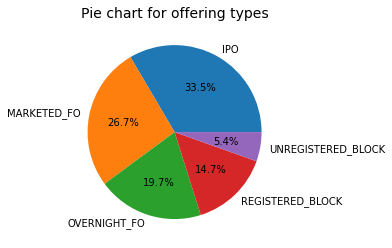

In [4]:
plt.figure(figsize = (10,4))
plt.pie(x=type_counts, autopct="%.1f%%",  labels = type_counts.index)
plt.title("Pie chart for offering types", fontsize=14)

<a id='bar'></a>
### Barplot

Bar plot is another way of visualizing categorical variables. We can speicify the order of the bars using 
```order=type_counts.index```. For example, from the figure below, we can learn that IPO are the largest segment of offering types in the provided data set. 

Text(0.5, 1.0, 'Bar chart for offering types')

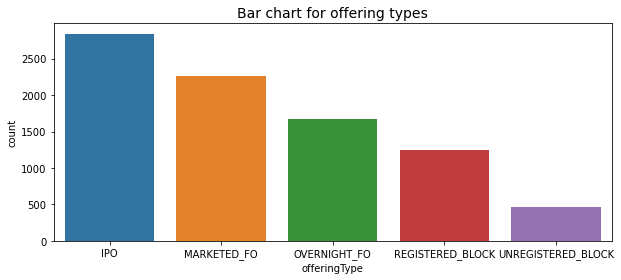

In [5]:
plt.figure(figsize = (10,4))
sns.countplot(data=cmg, x = 'offeringType', order=type_counts.index)
plt.title('Bar chart for offering types', fontsize = 14)

Sometimes when we have too many categories, we can make a vertical bar chart where the name of categories appear on the y-axis. 

Number of sectors  11
Number of sub-sectors  81


Text(0.5, 1.0, 'Bar charts for offering sectors')

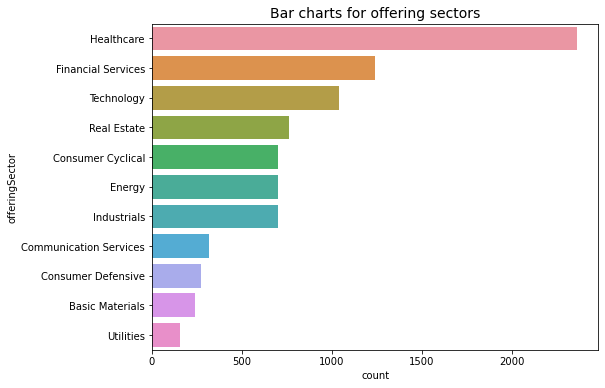

In [6]:
print('Number of sectors ', len(cmg['offeringSector'].unique()))
print('Number of sub-sectors ', len(cmg['offeringSubSector'].unique()))
plt.figure(figsize = (8, 6))
sns.countplot(data=cmg, y = 'offeringSector', order=cmg.offeringSector.value_counts().index)
plt.title('Bar charts for offering sectors', fontsize = 14)

<a id='hist'></a>
### Histogram

Histogram is a common way in visualizing distribution of continuous variables. A histogram displays the shape and spread of continuous data. For example, from the figure below, the distribution of number of bookrunners is right skewed. Most deals have lesss than 5 bookrunners.

Text(0.5, 1.0, 'Histogram of number of bookrunners')

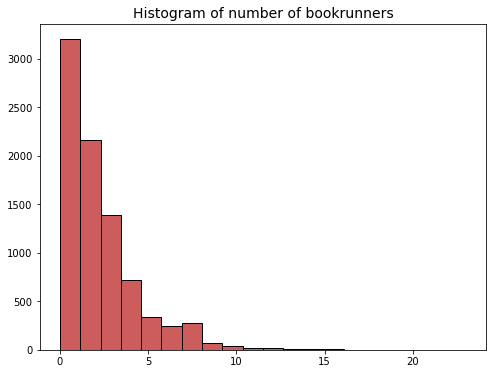

In [7]:
plt.figure(figsize =(8, 6))
plt.hist(cmg['totalBookrunners'], bins = 20, edgecolor='black', color = "indianred")
plt.title('Histogram of number of bookrunners', fontsize = 14)

<a id='box'></a>
### Boxplot

Another useful plot for visualizing distribution of continuous variables is the boxplot. A boxplot displays the distribution of data based on a five number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum).

The boxplots below shows the distributions of our outcome variables(returns). We find that boxplot is really good at showing outliers. In the right figures, by setting ```showfliers = False```, we removed all the outliers. The right figure is a great illustration for stock markets follow Brownian motion.

Here, we also introduce the concept of subplots. For example, ```fig, (ax1, ax2) = plt.subplots(1,2,figsize = (18, 5))``` specifies that we are creating a figure of size (18, 5) with 2 subplots in 1 row and 2 columns. 

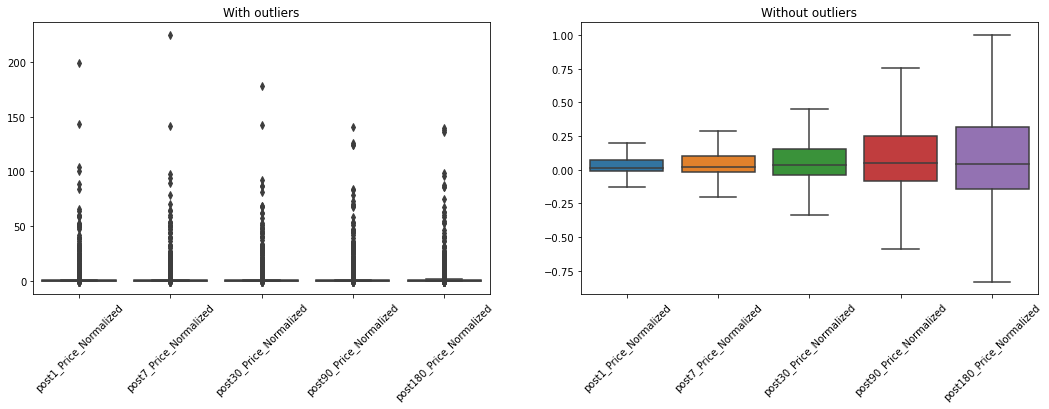

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (18, 5))
sns.boxplot(data = cmg.filter(regex = 'post'), ax = ax1)
ax1.set_title('With outliers')
ax1.tick_params('x', labelrotation=45)
sns.boxplot(data = cmg.filter(regex = 'post'), showfliers = False, ax = ax2)
ax2.set_title('Without outliers')
ax2.tick_params('x', labelrotation=45)

<a id='co'></a>
## 2. Multivariate analysis

Multivariate analysis is the analysis of more than one variable. Different from univariate analysis, we are looking for interactions and relationships between features. 

*a. Categorical vs Categorical*
- [Grouped bar chart](#groupedbar)
- [Heatmap](#heatmap)

*b. Categorical vs Continuous*
- [Grouped boxplot](#groupedbox)
- [Grouped line plot](#groupedline)

*c. Continous vs Continuous*
- [Scatterplot](#scatterplot)
- [Correlogram](#correlogram)

<a id='groupedbar'></a>
### Grouped bar chart 

In [9]:
LeadFirm_counts = cmg.leftLeadFirmName.value_counts()
top5_lead_firm = LeadFirm_counts.iloc[:5].index
print(top5_lead_firm)

Index(['Morgan Stanley', 'Goldman Sachs & Co.', 'J.P. Morgan',
       'BofA Securities', 'Citigroup'],
      dtype='object')


At this point, you are already familiar with using ```sns.countplot``` in creating bar charts. When plotting the subplot at the bottom, we simply specify ```hue='offeringSector'```. By doing this, we are essentially telling seaborn to use different colors in representing each sector. As a result, we no longer get a single bar for each lead firm, instead we get one bar for each sector. 

Text(0.5, 1.0, 'Bar chart of sectors of top5 lead firms(frequency)')

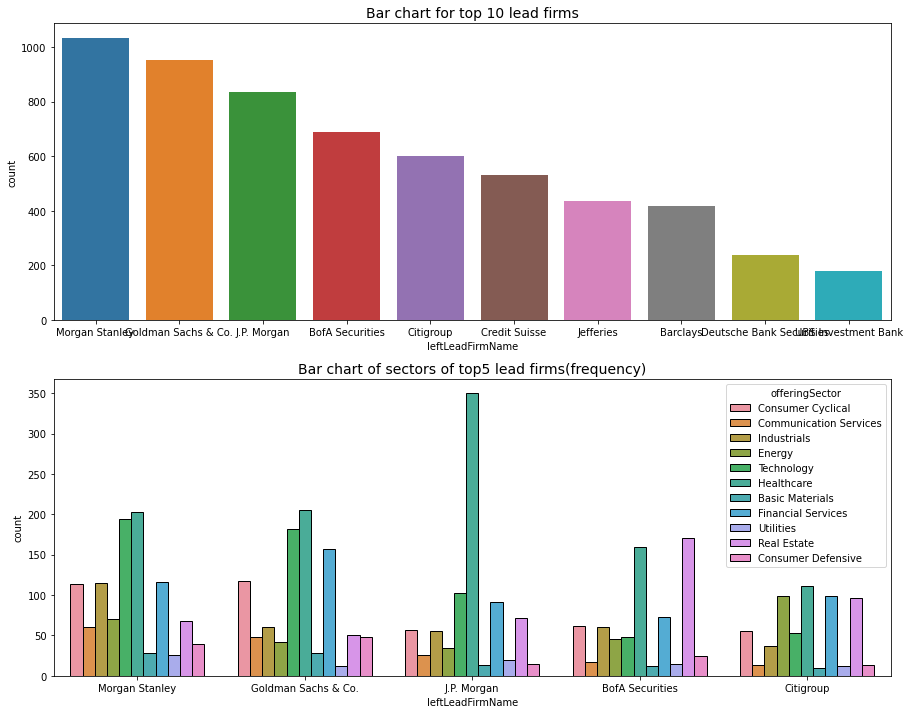

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 12), gridspec_kw={'height_ratios': [1, 1]}) # one row, two columns 
cmg['totalBookrunners'].value_counts()

sns.countplot(data=cmg, x = 'leftLeadFirmName', order=LeadFirm_counts.iloc[:10].index, ax = ax1)
ax1.set_title('Bar chart for top 10 lead firms', fontsize = 14)

sns.countplot(data=cmg, x = 'leftLeadFirmName', hue='offeringSector', edgecolor = 'black', order= top5_lead_firm, ax = ax2)
ax2.set_title('Bar chart of sectors of top5 lead firms(frequency)', fontsize = 14)

<a id='heatmap'></a>
### Heatmap


Heatmaps use variation in color to give visual cues to readers about how the observations is clustered or varies over space. For example, in the heatmap below, the darker the color, the more weights a firm puts in that sector. Since we are using percentage than raw percentage, we are safe to compare distribution between firms. We observe that the distribution of sectors between Morgan Stanley and Goldman Sachs are quite similar; JP Morgan puts more weight in Healthcare than any other firm. 

Text(0.5, 1.0, 'Heatmap of sector distribution of top5 lead firms(percentage)')

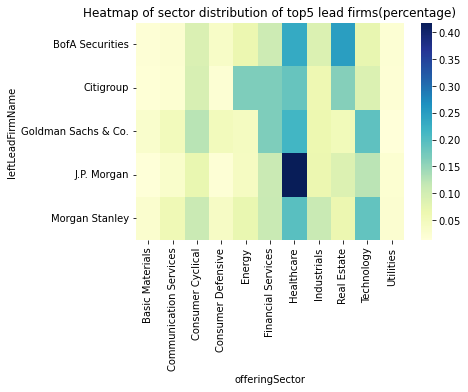

In [11]:
LeadFirm_Sector = cmg[cmg['leftLeadFirmName'].isin(top5_lead_firm)]\
    .groupby(['leftLeadFirmName', 'offeringSector']).size()\
    .reset_index()\
    .rename(columns = {0:'count'})

LeadFirm_Sector['percentage'] = LeadFirm_Sector['count']/LeadFirm_Sector.groupby('leftLeadFirmName')['count'].transform('sum')
LeadFirm_Sector = LeadFirm_Sector.pivot(index = 'leftLeadFirmName', columns = 'offeringSector', values = 'percentage')
sns.heatmap(LeadFirm_Sector, cmap = "YlGnBu")
plt.title('Heatmap of sector distribution of top5 lead firms(percentage)')

<a id='groupedbox'></a>
### Grouped boxplot

The boxplot below shows the distribution of offering prices for various sectors. We are essentially grouping deals based on their sector; and within each sector, we look at its distribution of offering prices. 

Text(0.5, 1.0, 'Boxplot of offering prices for sectors')

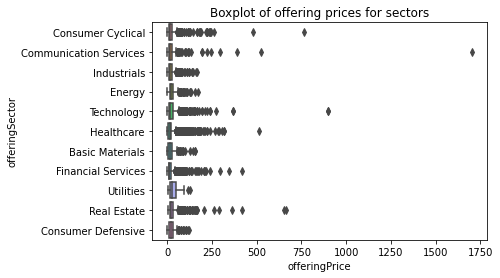

In [12]:
sns.boxplot(y = 'offeringSector', x = 'offeringPrice', data = cmg)
plt.title('Boxplot of offering prices for sectors')

<a id='groupedline'></a>
### Grouped line plot

Similar to what we have above, we are now grouping data by offering types; and then within each type, we compute its average returns at multiple timepoints. 

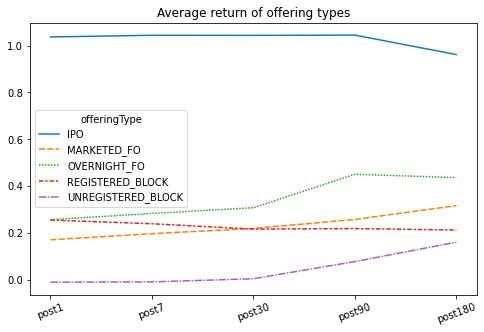

In [13]:
plt.figure(figsize = (8, 5))
type_avg = cmg.groupby('offeringType')[list(cmg.filter(like = 'post'))].mean()
type_avg.columns = [s.replace('_Price_Normalized', '') for s in list(type_avg)]
sns.lineplot(data = type_avg.T)
plt.title('Average return of offering types')
plt.xticks(rotation=20)
plt.show()

<a id='scatterplot'></a>
### Scatterplot 

A scatter plot uses dots to represent values for two different numeric variables. We can easily read correlation between varaibles from a scatter plot. When the y variable tends to increase as the x variable increases, we say there is a positive correlation between the two variables.

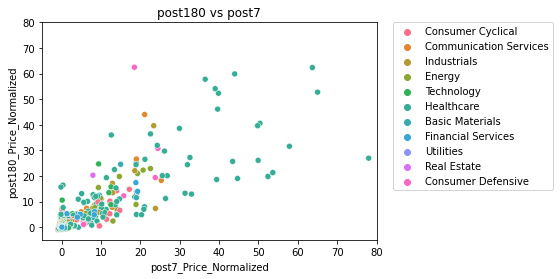

In [14]:
sns.scatterplot(data = cmg, x = 'post7_Price_Normalized', y= 'post180_Price_Normalized', hue = 'offeringSector')
plt.title('post180 vs post7')
plt.xlim(-5, 80)
plt.ylim(-5, 80)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<a id='correlogram'></a>
### Correlogram

We introduced heatmap in an earlier code cell.The correlogram is essentially a heatmap, where the color of each cell represents the correlation strength between two varaibles. For example, the correlation between pre15_Price_Normalized and offeringPrice is -0.049(very close to 0). This is expected, since pre15_Price_Normalized is simply raw price normalized with respect to offering price. 

The cell below also shows you how to save a figure, simply call ```plt.savefig```.

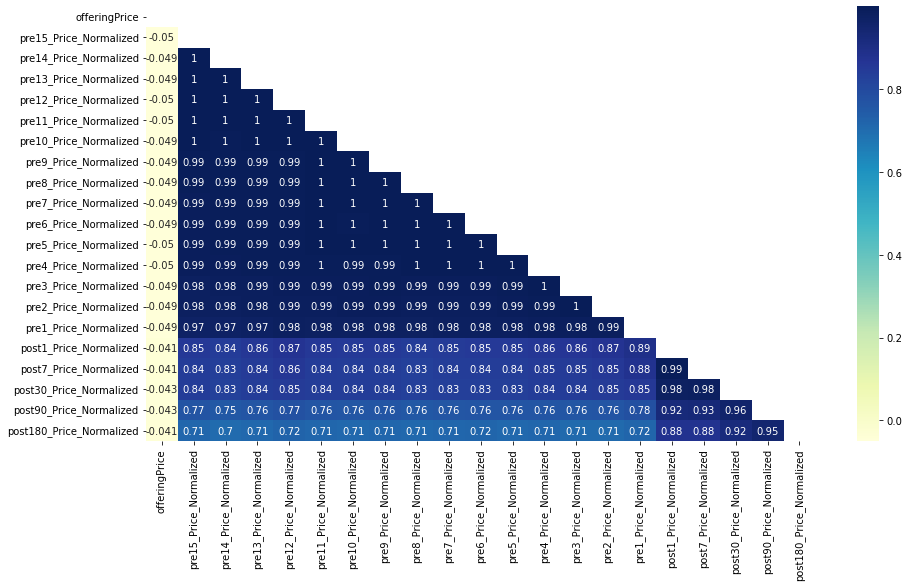

<Figure size 432x288 with 0 Axes>

In [15]:
# create a figure 
plt.figure(figsize = (15,8))
corr = cmg.filter(like="Price").corr()
matrix = np.triu(corr)
sns.heatmap(corr, cmap="YlGnBu", annot=True, mask = matrix)
plt.show()
# save a figure 
plt.savefig('team_XX_fig1.png')